In [22]:
import csv
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [44]:
path_table1_moon_c10 = Path("/Users/javier/moon_results/results/2024-09-02/20-28-09")
path_table1_fedprox_c10 = Path("/Users/javier/moon_results/results/2024-09-02/22-46-30")
path_table1_moon_c100 = Path("/Users/javier/moon_results/results/2024-09-03/01-07-04")
path_table1_fedprox_c100 = Path("/Users/javier/moon_results/results/2024-09-03/17-57-35")

figure8_moon_c100 = Path("/Users/javier/moon_results/results/2024-09-03/10-25-13")
figure8_fedprox_c100 = Path("/Users/javier/moon_results/results/2024-09-04/07-33-04")

In [30]:
def read_from_results(path_to_results: str):
    """Return metrics as lists and config for run."""
    round_number = []
    loss = []
    accuracy = []
    
    with open(path_to_results/"results.csv", mode='r') as file:
        csv_reader = csv.reader(file)
        
        # Skip the header if your CSV has one
        next(csv_reader)
    
        # Iterate over each row in the CSV
        for row in csv_reader:
            round_number.append(int(row[0]))
            loss.append(float(row[1]))
            accuracy.append(100*float(row[2]))

        # Now load config
        with open(path_to_results/"run_config.json", 'r') as file:
            config = json.load(file)
    
    return config, round_number, loss, accuracy

In [49]:
def make_plot(results_paths: list[Path]):

    for path in results_paths:
        config, rounds, loss, acc = read_from_results(path)
        algo = config["alg"]
        print(f"Max accuracy ({algo}): {max(acc):.2f}")
        plt.plot(rounds, acc, label=algo)
    plt.grid()
    plt.legend()

Max accuracy (moon): 73.61
Max accuracy (fedprox): 72.89


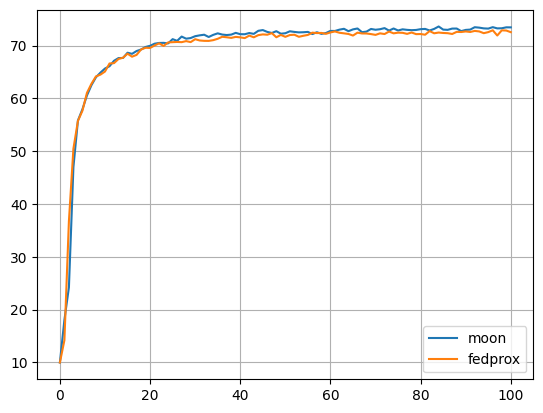

In [50]:
make_plot([path_table1_moon_c10, path_table1_fedprox_c10])

Max accuracy (moon): 67.64
Max accuracy (fedprox): 65.48


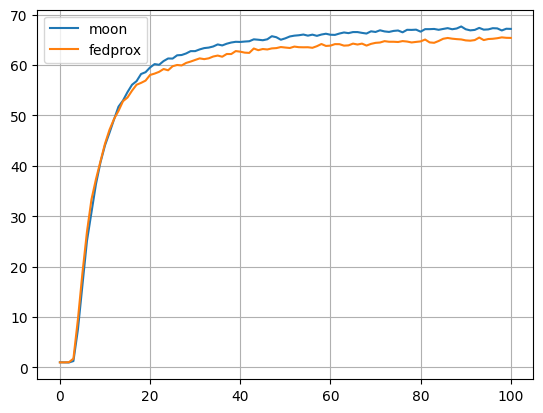

In [51]:
make_plot([path_table1_moon_c100, path_table1_fedprox_c100])

Max accuracy (moon): 59.08
Max accuracy (fedprox): 49.41


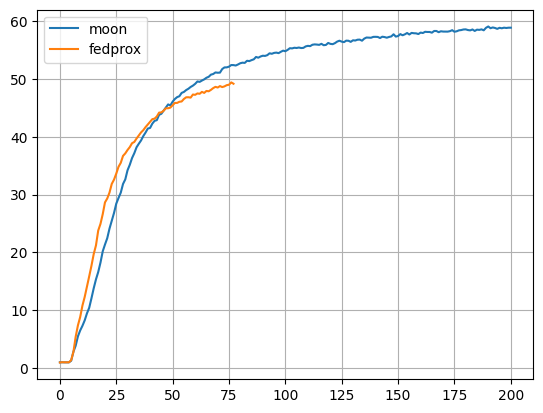

In [52]:
make_plot([figure8_moon_c100, figure8_fedprox_c100])